In [19]:
import cv2
import os
import numpy as np
import json
import requests
import glob
import random
import matplotlib.pyplot as plt

In [42]:
DATA_FOLDER = os.path.abspath('') + '/../data/'
SERVER_URL = 'http://localhost:8501/v1/models/model:predict'

def get_sample_image(size=(64,64), see=False):
    filenames = glob.glob(DATA_FOLDER+'/*/*.jpg')
    image = cv2.imread(random.choice(filenames))
    image = cv2.resize(image, size)
    if see:
        plt.imshow(image)
    return image

def make_request(data):
    return json.dumps({
        "signature_name": "serving_default",
        "instances": [data.tolist()],
    })

{'predictions': [[0.000182428688, 0.99981755]]}

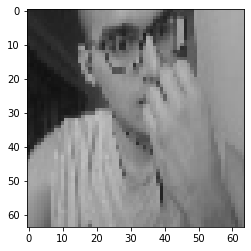

In [43]:
images = get_sample_image(see=True)
data = make_request(images)
response = requests.post(SERVER_URL, data=data)
response.raise_for_status()
response = response.json()
response

In [57]:
np.array(json.loads(data)['instances']).dtype

dtype('int64')

In [58]:
np.array([ [[[0,0,0]] * 64] * 64 ]).dtype

dtype('int64')